In [1]:
import json
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import random
import networkx as nx

import seaborn as sns
sns.set(color_codes=True)

import matplotlib.gridspec as gridspec
from scipy.cluster import hierarchy

mpl.style.use('seaborn')
%matplotlib inline

### Criterios del registro
    @MafeCarrascal
    @CathyJuvinao
    @FabianSanabriaS
    @DanielSamperO
    @ClaudiaLopez
    @AngelicaLozanoC
    @AntanasMockus
    @ArielAnaliza
    @datoatipico
    @Rivas_Santiago
    @Uriasv
    @cielo_rusinque
    @MeDicenWally
    @intiasprilla
    @navarrowolff
    @angelamrobledo
    @DavidRacero
    @MirandaBogota
    @MauroToroO
    @conycamelo
    @eljulisastoque
    @JULIOC_HERRERA
    @AlvaroUribeVel
    @MariaFdaCabal
    @natiibedoya
    @CatalinaSuarezB
    @MiguelPoloP

# Loader


In [2]:
#get users and mentions from the download files:
tweets_datas_path = ["cuentas_tweets_0.json","cuentas_tweets_1.json"]
tw_id=[]
tw_user_id=[]
tw_user=[]
# tw_text=[]
entities_long=[]
mentioned_ids=[]
tw_device=[]# print(twits[rnd_ind]["source"])
tw_date=[]# print(twits[rnd_ind]["created_at"])


for json_file in tweets_datas_path:
    with open(json_file, "r") as tweets_file:
        for line in tweets_file:
            try:
                tweet = json.loads(line)
                tw_entities=[]
                tw_entities.extend(tweet["entities"]["user_mentions"])
                entities_long.extend(tweet["entities"]["user_mentions"])
                tw_text_loop=[tweet["text"]]
#                 if tweet["truncated"]:#=="True": # Truncated indica si el tweet es corto o largo; si truncado, busca extendido
#                     tw_text_loop=[tweet["extended_tweet"]["full_text"]]
#                     tw_entities.extend(tweet["extended_tweet"]["entities"]["user_mentions"])
#                     entities_long.extend(tweet["extended_tweet"]["entities"]["user_mentions"])
#                 else:
#                     if tweet["text"][0:2]=="RT":
#                         if tweet["retweeted_status"]["truncated"]:
#                             tw_text_loop=[tweet["retweeted_status"]["extended_tweet"]["full_text"]]
#                             tw_entities.extend(tweet["retweeted_status"]["extended_tweet"]["entities"]["user_mentions"])
#                             entities_long.extend(tweet["retweeted_status"]["extended_tweet"]["entities"]["user_mentions"])
#                         else: 
#                             tw_text_loop=[tweet["retweeted_status"]["text"]]
#                             tw_entities.extend(tweet["retweeted_status"]["entities"]["user_mentions"])
#                         if tweet["retweeted_status"]["is_quote_status"]:
#                             tw_text_loop=[tweet["extended_tweet"]["full_text"]]
#                             tw_entities.extend(tweet["retweeted_status"]["quoted_status"]["entities"]["user_mentions"])
#                             entities_long.extend(tweet["retweeted_status"]["quoted_status"]["entities"]["user_mentions"])
#                     else:
#                         tw_text_loop=[tweet["text"]]
                tw_id.append(tweet["id_str"])
                tw_user_id.append(tweet["user"]["id_str"])
                tw_user.append(tweet["user"]["screen_name"])
                mentioned_ids.append([tweet["id_str"],tweet["user"]["id_str"],list(set([ent["id_str"] for ent in tw_entities]))])
#                 tw_text.append([tweet["id_str"],tw_text_loop])
                tw_device.append(tweet["source"])
                tw_date.append(tweet["created_at"])
            except:
                continue

In [3]:
print("Tweets identificados con código     :",len(tw_id),"\n",
      "Tweets con usuario identificado     :",len(tw_user_id),"\n",
      "Tweets con nombre de usuario        :",len(tw_user),"\n",
#       "Textos de tweets recuperados        :",len(tw_text),"\n",
      "Total de Menciones en los tweets    :",len(entities_long),"\n",
      "Tweets con menciones identificadas  :",len(mentioned_ids),"\n",
      "Tweets con dispositivos registrado  :",len(tw_device),"\n",
      "Tweets con fechas registradas       :",len(tw_date),"\n"
     )

Tweets identificados con código     : 322145 
 Tweets con usuario identificado     : 322145 
 Tweets con nombre de usuario        : 322145 
 Total de Menciones en los tweets    : 905794 
 Tweets con menciones identificadas  : 322145 
 Tweets con dispositivos registrado  : 322145 
 Tweets con fechas registradas       : 322145 



In [4]:
tweets_ids=pd.DataFrame({"tw_user_id":tw_user_id,"tw_user":tw_user}, index=tw_id)
ids_freqs=pd.crosstab(index=tweets_ids.tw_user, columns="count")
ids_freqs=ids_freqs.sort_values(by=['count'] , ascending=False)["count"]
print("twiteros:",ids_freqs.shape[0])

twiteros: 59919


row_0
<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>    206328
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>       62181
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       27208
<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>                  21535
<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>         3755
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>        291
<a href="https://twitter.com/indirectasrock" rel="nofollow">CabronaGold-2</a>              173
<a href="http://www.twitter.com/noviosicopata" rel="nofollow">CabronaGold-2a</a>           164
<a href="https://mobile.twitter.com" rel="nofollow">Mobile Web (M2)</a>                    141
<a href="https://twitterrific.com/ios" rel="nofollow">Twitterrific for iOS</a>              37
<a href="http://www.tweetcaster.com" rel="no

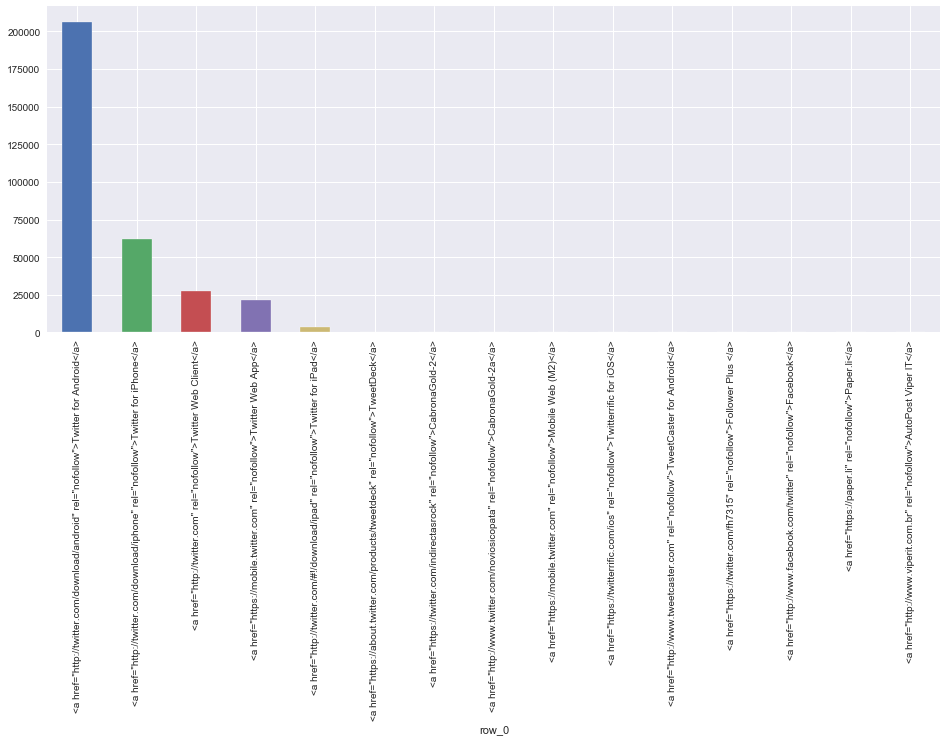

In [5]:
devices=pd.crosstab(index=np.array(tw_device), columns="count")
devices=devices.sort_values(by=['count'] , ascending=False)["count"]
devices[:15].plot(figsize=(16, 6), kind="bar")
devices[:15]

C:\Users\Alexis\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


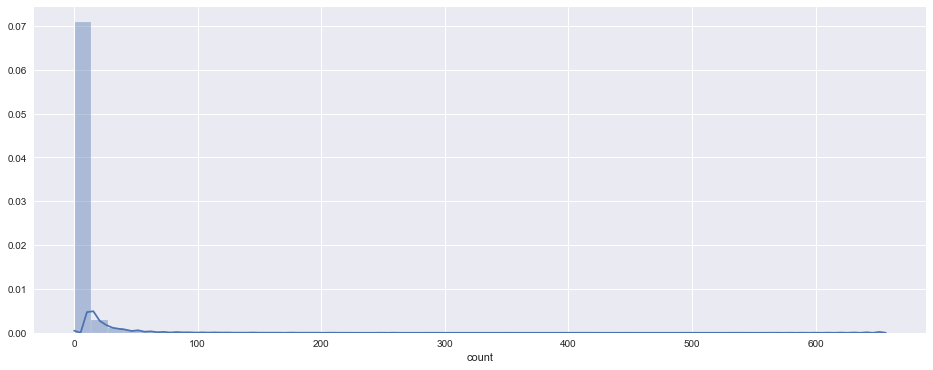

In [6]:
plt.figure(figsize=(16,6))
sns.distplot(ids_freqs)

In [7]:
round(ids_freqs.describe(),3)

count    59919.000
mean         5.376
std         16.175
min          1.000
25%          1.000
50%          2.000
75%          4.000
max        656.000
Name: count, dtype: float64

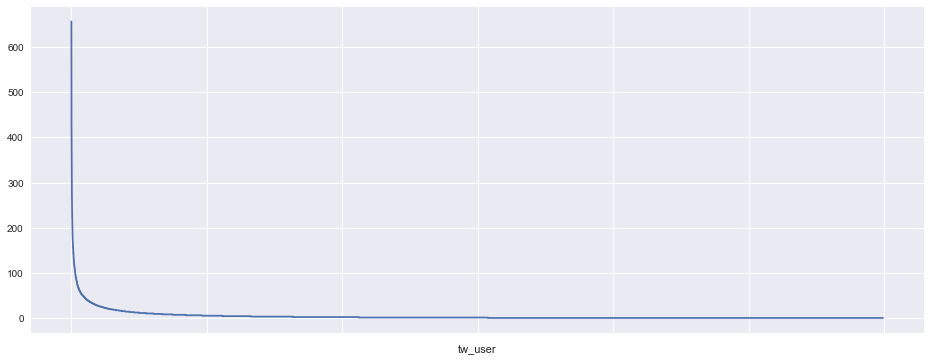

In [8]:
ids_freqs.plot(figsize=(16, 6))

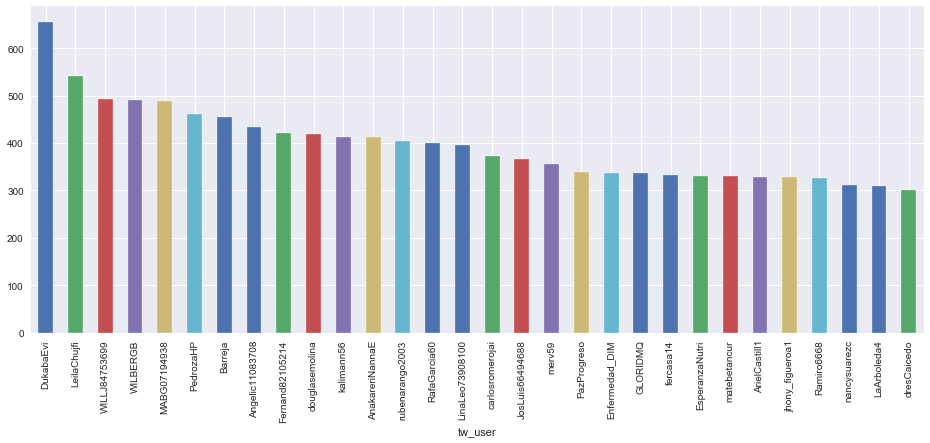

In [9]:
ids_freqs[:30].plot(figsize=(16, 6), kind="bar")
plt.savefig('top_tweeters.png')

In [10]:
ids_freqs.sort_values(ascending=False)[:60]

tw_user
DukabaEvi          656
LeilaChujfi        541
WILLJ84753699      494
WILBERGB           491
MABG07194938       489
PedrozaHP          461
Barreja            455
Angelic11083708    434
Fernand82105214    421
douglasemolina     420
AnakareriNannaE    412
kalimann56         412
rubenarango2003    404
RafaGarcia60       400
LinaLeo73908100    396
carlosromerojai    372
JosLuis66494688    367
merv59             355
PazProgreso        340
Enfermedad_DIM     338
GLORIDMQ           336
fercasa14          333
EsperanzaNutri     330
matebetancur       330
jhony_figueroa1    329
ArielCastill1      329
Ramiro6668         326
nancysuarezc       312
LaArboleda4        310
dresCaicedo        302
celso_castilla     300
nos_verdad         299
Camava3            295
H_U_V_A            288
alejopereira27     286
Colombia_y_yo      279
argkon             276
mareba82           272
rafistan73         268
aarangob11         267
8698599j           263
EdwinGaviria17     261
alfredoboita       261
ern

In [11]:
uniq_ids=list(set([entit["id_str"]for entit in entities_long]))
len(uniq_ids)

22939

In [12]:
ments_df=pd.DataFrame([[entit["id_str"],
                        entit["screen_name"],
                        entit["name"]
                       ]for entit in entities_long],
                     columns=["id_str","screen_name","name"])

In [13]:
ments_freq=pd.crosstab(index=ments_df.screen_name, columns="count")
ments_freq=ments_freq.sort_values(by=['count'] , ascending=False)
print("Cuentas mencionadas",ments_freq.shape[0])

Cuentas mencionadas 22980


# Clustering Nexos¶


In [14]:
# Tabla de ocurrencia de menciones por tuit
id_ments=pd.crosstab(np.array([tw_mnt for tw_mntns in mentioned_ids for tw_mnt in tw_mntns[2] ]), columns="count").sort_values(ascending=False, by="count")

In [15]:
top_n=300

In [16]:
ments_ids_top=list(id_ments.index[:top_n])

In [17]:
mntns_top_ocurr=np.array([[cand in tw_mntns[2] for cand in ments_ids_top]for tw_mntns in mentioned_ids])

In [18]:
mntns_top_ocurr.shape

(322145, 300)

In [19]:
names_mnts_top=[]
for usr_id in id_ments.index[:top_n]:
    name=""
    try:
        name=ments_df[ments_df.id_str==usr_id].screen_name.iloc[0]
    except:
        name="Unknown"
#     print(usr_id, name)
    names_mnts_top.append(name)
        
#     print(usr_id,tweets_ids[tweets_ids.tw_user_id==usr_id].tw_user.iloc[0])

In [20]:
# twtxt_ids=[txt_id[0] for txt_id in tw_text] # Id del tuit con el texto
df_mntns_top_ocurr=pd.DataFrame(mntns_top_ocurr,columns=names_mnts_top, index=tw_id)

DanielSamperO      34644
Uriasv             32807
MafeCarrascal      32543
ClaudiaLopez       25952
natiibedoya        17345
IvanDuque          16164
petrogustavo       13322
navarrowolff       11487
VickyDavilaH       11343
angelamrobledo     10904
CathyJuvinao       10515
DavidRacero         9085
MariaFdaCabal       8521
matadoreltiempo     7767
Rivas_Santiago      7730
AngelicaLozanoC     6974
AlvaroUribeVel      6221
NanyPardo           4828
FabianSanabriaS     4732
cielo_rusinque      4391
dtype: int64


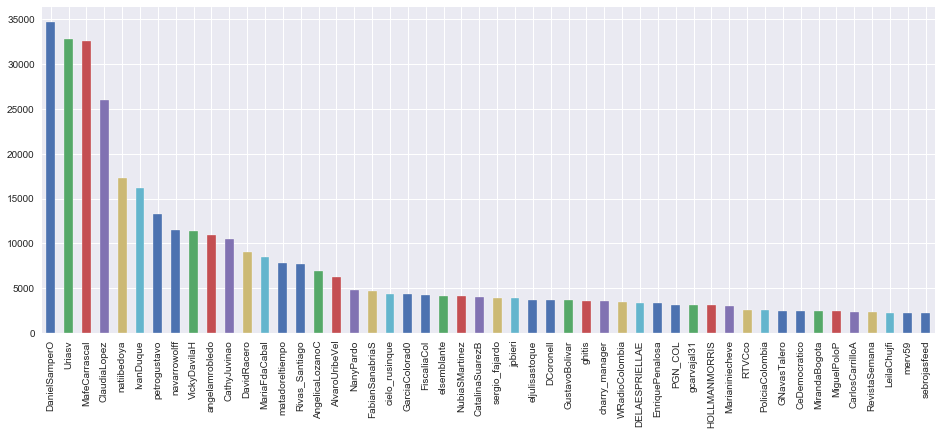

In [21]:
plt.figure(figsize=(16,6))
print (df_mntns_top_ocurr.sum(axis=0).sort_values(ascending=False)[:20])
df_mntns_top_ocurr.sum(axis=0).sort_values(ascending=False)[:50].plot(kind="bar")
plt.savefig('top_mentions.png')

In [22]:
# mntns_ward= hierarchy.linkage(df_mntns_top_ocurr.transpose(), 'ward')

In [23]:
# #max_d = 10
# plt.figure(figsize=(10,100))
# #plt.figure()
# dn = hierarchy.dendrogram(mntns_ward,orientation="left", labels=names_mnts_top)
# #plt.axhline(y=max_d, c='k')
# plt.title('Ward Link Dendrogram por tweets')
# plt.yticks(fontsize=16)
# plt.savefig('dendrograma_ward_link_mentions.png')
# plt.show()

# Relaciones de cuentas

In [24]:
directed_graph_df=df_mntns_top_ocurr.groupby(tw_user).aggregate(sum)

In [25]:
mntns_ward_usr= hierarchy.linkage(directed_graph_df.transpose(), 'ward')

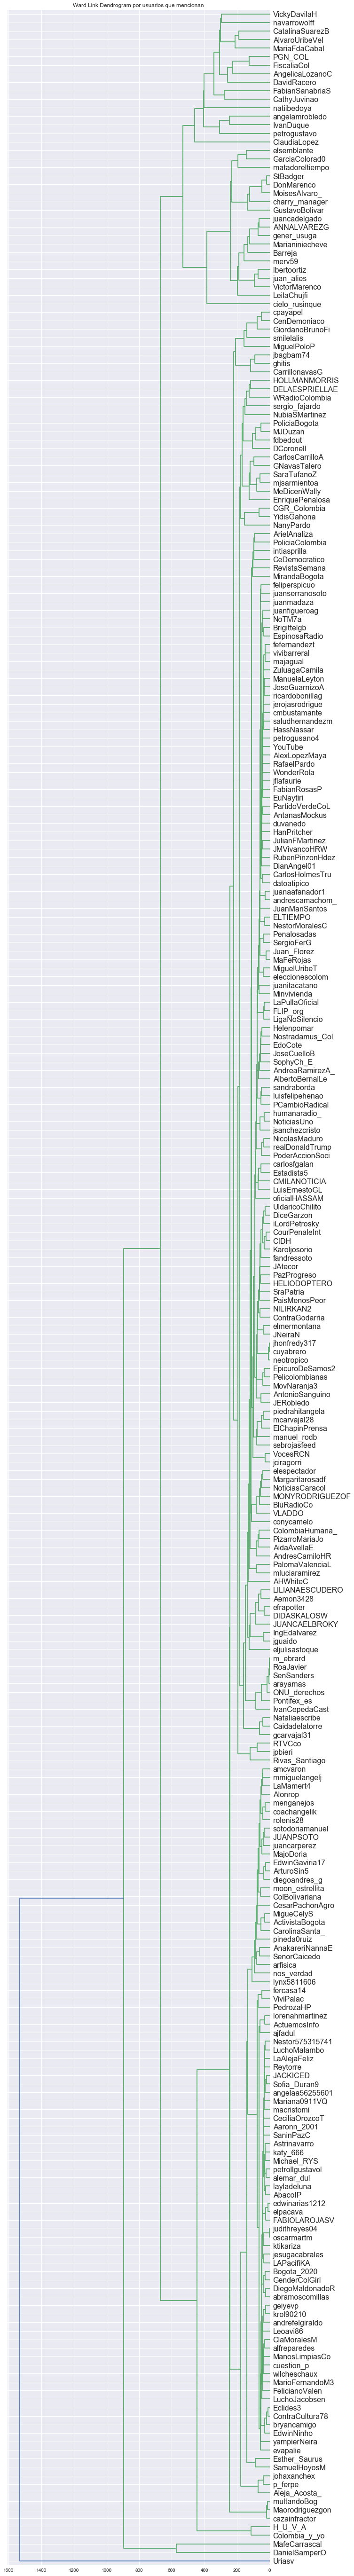

In [26]:
#max_d = 10
plt.figure(figsize=(10,100))
#plt.figure()
dn = hierarchy.dendrogram(mntns_ward_usr,orientation="left", labels=names_mnts_top)
#plt.axhline(y=max_d, c='k')
plt.title('Ward Link Dendrogram por usuarios que mencionan')
plt.yticks(fontsize=16)
# plt.savefig('dendrograma_ward_link_mentions.png')
plt.show()

In [27]:
directed_graph_df.sum(axis=1).sort_values(ascending=False)[:50]#Mayores tuiteros

LeilaChujfi        2086.0
Barreja            1420.0
merv59             1261.0
WILBERGB            963.0
AnakareriNannaE     928.0
douglasemolina      879.0
DukabaEvi           843.0
WILLJ84753699       810.0
GLORIDMQ            766.0
Angelic11083708     751.0
ariasen978          734.0
Fernand82105214     732.0
MABG07194938        702.0
wilromerol          699.0
H_U_V_A             695.0
Colombia_y_yo       660.0
PedrozaHP           660.0
fercasa14           651.0
kalimann56          626.0
LinaLeo73908100     609.0
PazProgreso         606.0
rubenarango2003     600.0
Enfermedad_DIM      577.0
ArielCastill1       569.0
matebetancur        562.0
JosLuis66494688     558.0
maxmaye15354547     554.0
RafaGarcia60        549.0
ernesto1972m6       545.0
nancysuarezc        525.0
EsperanzaNutri      519.0
carlosromerojai     514.0
Ramiro6668          512.0
Miryam78151448      507.0
MiguelPopPolo1      503.0
jhony_figueroa1     487.0
LaArboleda4         482.0
celso_castilla      481.0
Carrillonava

In [28]:
directed_graph_df.sum(axis=0).sort_values(ascending=False)[:50]#Los más tuiteados

DanielSamperO      34644.0
Uriasv             32807.0
MafeCarrascal      32543.0
ClaudiaLopez       25952.0
natiibedoya        17345.0
IvanDuque          16164.0
petrogustavo       13322.0
navarrowolff       11487.0
VickyDavilaH       11343.0
angelamrobledo     10904.0
CathyJuvinao       10515.0
DavidRacero         9085.0
MariaFdaCabal       8521.0
matadoreltiempo     7767.0
Rivas_Santiago      7730.0
AngelicaLozanoC     6974.0
AlvaroUribeVel      6221.0
NanyPardo           4828.0
FabianSanabriaS     4732.0
cielo_rusinque      4391.0
GarciaColorad0      4371.0
FiscaliaCol         4257.0
elsemblante         4111.0
NubiaSMartinez      4105.0
CatalinaSuarezB     4021.0
sergio_fajardo      3861.0
jpbieri             3859.0
eljulisastoque      3731.0
DCoronell           3684.0
GustavoBolivar      3649.0
ghitis              3630.0
charry_manager      3565.0
WRadioColombia      3504.0
DELAESPRIELLAE      3360.0
EnriquePenalosa     3334.0
PGN_COL             3163.0
gcarvajal31         3119.0
H

# Temporalidad

In [29]:
tw_fechas_df=pd.DataFrame(np.column_stack([tw_user,tw_date]))
tw_fechas_df.columns=["user","date_tweet"]
tw_fechas_df["date_tweet"]=pd.to_datetime(tw_fechas_df['date_tweet'], utc=True)#.tz_convert('US/Eastern')
tw_fechas_df.set_index('date_tweet', inplace=True)#.tz_convert('US/Eastern')
tw_fechas_df.index=tw_fechas_df.index.tz_convert('US/Eastern')
tw_fechas_df["ocurr"]=1

In [30]:
time_sample="600S"

In [31]:
tot_tw_fechas=tw_fechas_df.ocurr.resample(time_sample).sum()

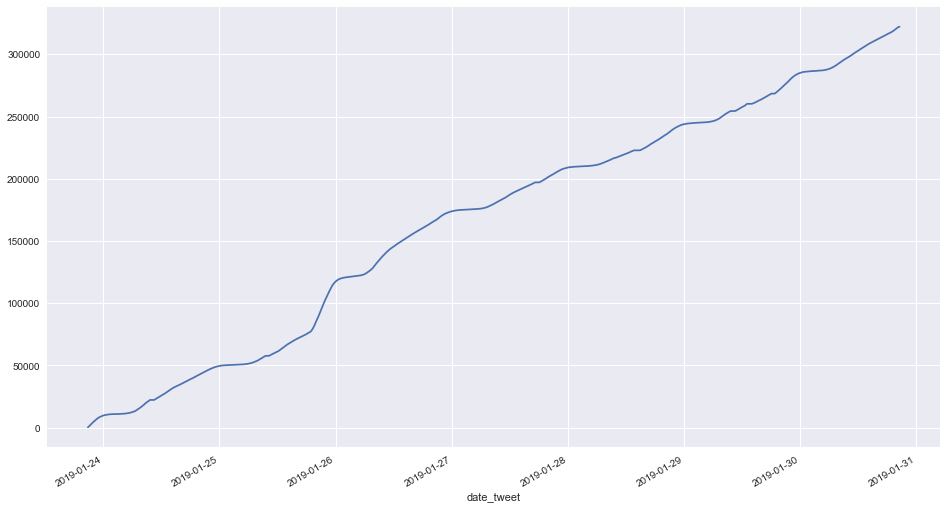

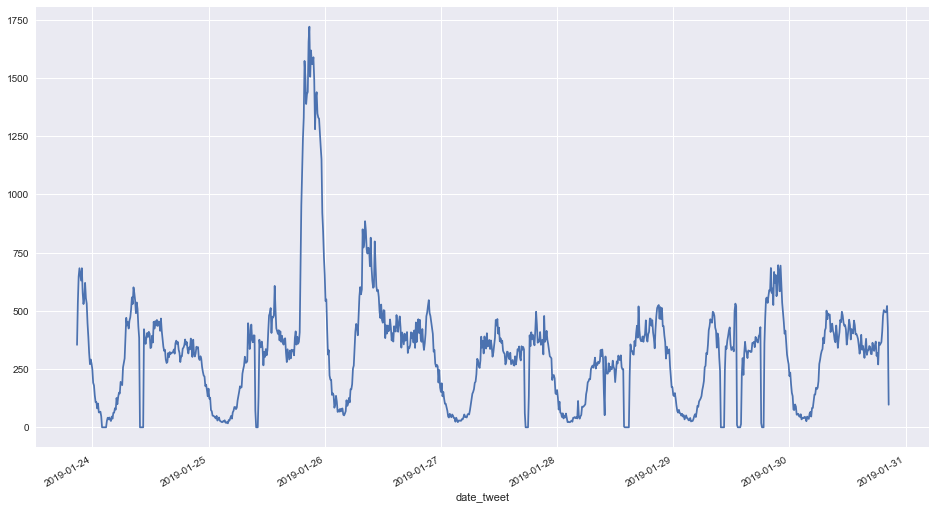

In [32]:
plt.figure(figsize=(16,9))
tot_tw_fechas.cumsum().plot()#kind="bar")
plt.show()

plt.figure(figsize=(16,9))
tot_tw_fechas.plot()#kind="bar")
plt.show()

In [33]:
mayor_tweeters=list(directed_graph_df.sum(axis=1).sort_values(ascending=False).index[:10])

In [34]:
tw_fechas_df_top=tw_fechas_df[tw_fechas_df.user.isin(mayor_tweeters)]
#tw_fechas_df_filt.head(20)

In [35]:
twits_filt=pd.crosstab(index=tw_fechas_df_top.index,
                  columns=tw_fechas_df_top["user"])
twits_filt=twits_filt.resample(time_sample).sum()

user
DukabaEvi          656
LeilaChujfi        541
WILLJ84753699      494
WILBERGB           491
Barreja            455
Angelic11083708    434
douglasemolina     420
AnakareriNannaE    412
merv59             355
GLORIDMQ           336
dtype: int64

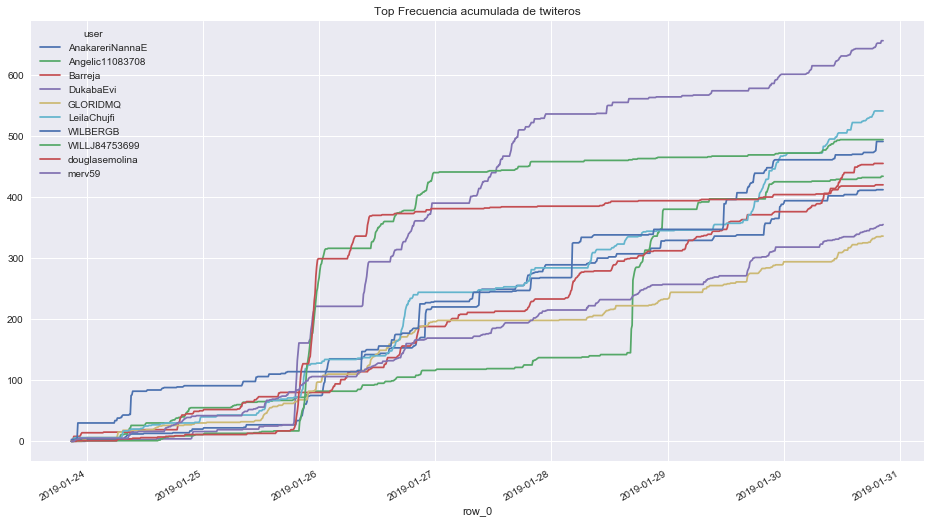

In [36]:
twits_filt.cumsum().plot(figsize=(16,9), title=("Top Frecuencia acumulada de twiteros"))
twits_filt.sum(axis=0).sort_values(ascending=False)[:10]

In [37]:
top_ments_df=df_mntns_top_ocurr.copy()*1
top_ments_df.index=tw_fechas_df.index
# top_ments_df.head(20)

In [38]:
top_ments_df_day=top_ments_df.iloc[:,:10].resample(time_sample).sum()
top_ments_df_day.sum(axis=0)

DanielSamperO     34644
Uriasv            32807
MafeCarrascal     32543
ClaudiaLopez      25952
natiibedoya       17345
IvanDuque         16164
petrogustavo      13322
navarrowolff      11487
VickyDavilaH      11343
angelamrobledo    10904
dtype: int64

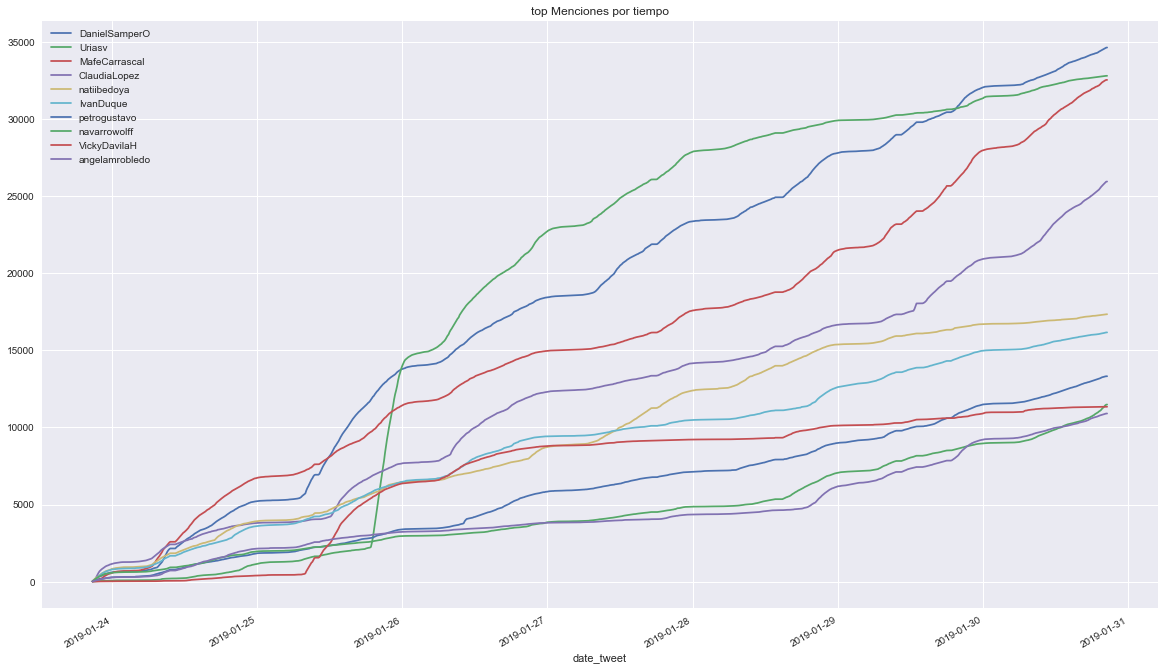

In [39]:
top_ments_df_day.cumsum().plot(figsize=(20,12), title="top Menciones por tiempo")
# (tot_tw_fechas.cumsum()*max(top_ments_df_day.sum(axis=0))/max(tot_tw_fechas.cumsum())).plot(color="black", linestyle='dashed')#kind="bar")

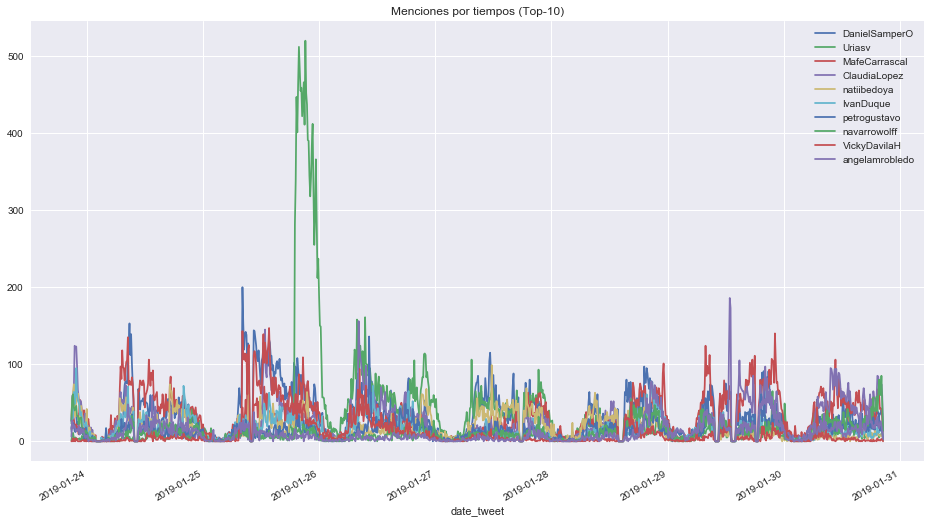

In [40]:
top_ments_df_day.plot(figsize=(16,9), title="Menciones por tiempos (Top-10)")

# Grafos

In [64]:
mat_size=75
graph_mat=directed_graph_df.loc[directed_graph_df.sum(axis=1).sort_values(ascending=False).index[:mat_size],
                                directed_graph_df.sum(axis=0).sort_values(ascending=False).index[:mat_size]
                               ]
graph_mat.head()

,DanielSamperO,Uriasv,MafeCarrascal,ClaudiaLopez,natiibedoya,IvanDuque,petrogustavo,navarrowolff,VickyDavilaH,angelamrobledo,...,SenorCaicedo,GiordanoBrunoFi,SamuelHoyosM,ElChapinPrensa,CesarPachonAgro,juan_alies,pineda0ruiz,juanserranosoto,gener_usuga,jciragorri
LeilaChujfi,45.0,55.0,45.0,4.0,8.0,11.0,74.0,2.0,5.0,7.0,...,6.0,25.0,0.0,0.0,0.0,26.0,1.0,0.0,74.0,0.0
Barreja,25.0,44.0,28.0,13.0,5.0,12.0,36.0,3.0,9.0,13.0,...,9.0,23.0,2.0,0.0,1.0,21.0,5.0,0.0,39.0,0.0
merv59,18.0,28.0,24.0,7.0,0.0,22.0,22.0,2.0,0.0,4.0,...,9.0,12.0,0.0,0.0,1.0,36.0,5.0,0.0,42.0,0.0
WILBERGB,90.0,18.0,114.0,20.0,67.0,9.0,21.0,5.0,1.0,4.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
AnakareriNannaE,17.0,131.0,13.0,5.0,4.0,18.0,21.0,2.0,7.0,38.0,...,22.0,8.0,4.0,0.0,5.0,4.0,3.0,0.0,9.0,0.0


In [65]:
graph_df=graph_mat.melt()
graph_df.columns=["tw_para", "freq"]
graph_df["tw_de"]=[usr for i in range(int(len(graph_df)/len(graph_mat.index)))for usr in list(graph_mat.index)]
graph_df=graph_df.loc[:,["tw_de","tw_para","freq"]]

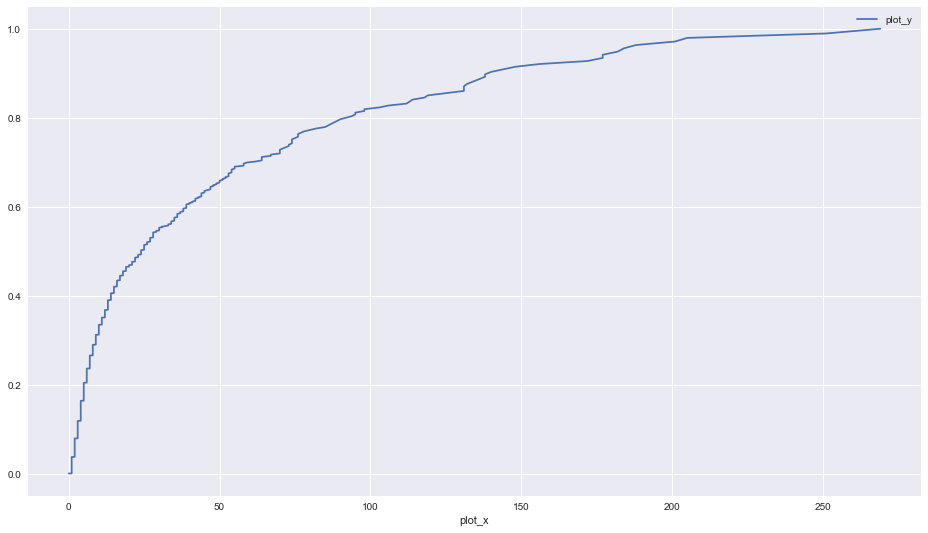

In [66]:
plot_x=np.array(list(graph_df.freq.sort_values(ascending=True)))
plot_y=np.cumsum(plot_x)/sum(plot_x)
cum_freq=pd.DataFrame({"plot_x":plot_x,
                       "plot_y":plot_y})
cum_freq.plot(x="plot_x",
              y="plot_y",
             figsize=(16,9))

In [67]:
min_crit_tw=cum_freq[cum_freq.plot_y>=.4].iloc[0,0]
graph_df_filt=graph_df.loc[graph_df.freq>=min_crit_tw,:]
mx_fr=max(graph_df_filt.freq)
print(min_crit_tw)
print(len(graph_df_filt))
graph_df_filt.sort_values("freq",ascending=False)#.head(20)

14.0
363


,tw_de,tw_para,freq
81,DukabaEvi,Uriasv,269.0
104,nancysuarezc,Uriasv,251.0
1425,LeilaChujfi,cielo_rusinque,205.0
148,nos_verdad,Uriasv,201.0
80,douglasemolina,Uriasv,188.0
82,WILLJ84753699,Uriasv,184.0
91,PedrozaHP,Uriasv,182.0
1426,Barreja,cielo_rusinque,177.0
1359,Angelic11083708,FabianSanabriaS,177.0
87,MABG07194938,Uriasv,172.0


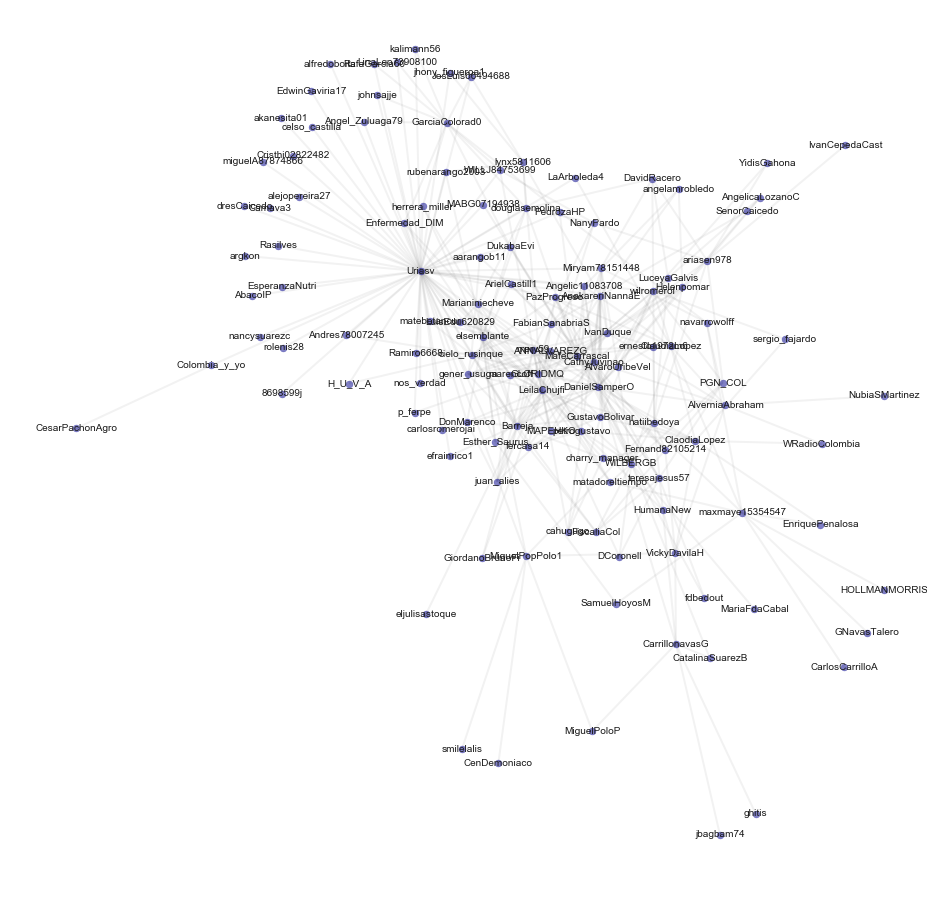

In [68]:
G_2= nx.Graph()#nx.generators.directed.random_k_out_graph(10, 3, 0.5)
for i, elrow in graph_df_filt.iterrows():
    G_2.add_edge(elrow[0], elrow[1])

pos_2 = nx.layout.spring_layout(G_2)

plt.figure(figsize=(16,16))
edges = nx.draw_networkx_edges(G_2, pos_2, edge_color="gray", alpha=.1, width=2)
nodes = nx.draw_networkx_nodes(G_2, pos_2, node_size=50, node_color='darkblue', alpha=.5)
labels = nx.draw_networkx_labels(G_2, pos_2, font_size=10)
ax = plt.gca()
ax.set_axis_off()
plt.show()

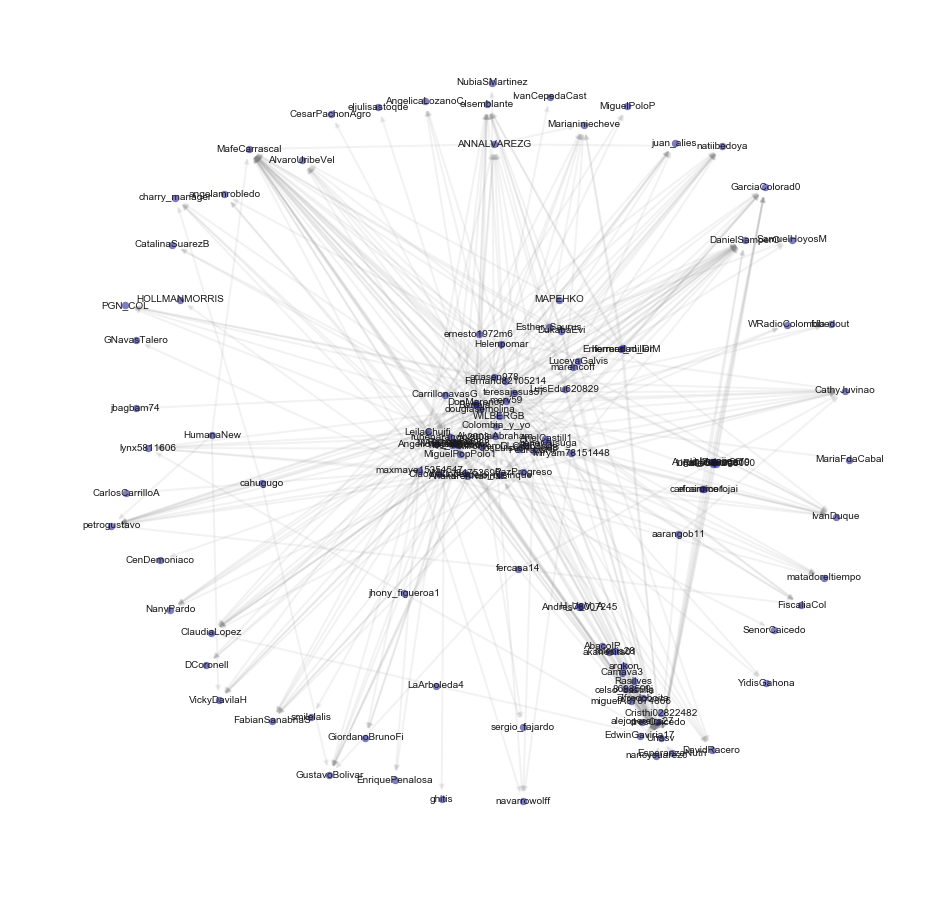

In [69]:
plt.figure(figsize=(16,16))
G_1= nx.DiGraph()
for i, elrow in graph_df_filt.iterrows():
    G_1.add_edge(elrow[0], elrow[1])

pos_1 = nx.layout.spring_layout(G_1)

edges = nx.draw_networkx_edges(G_1, pos_1, edge_color="gray", alpha=.1, width=2)
nodes = nx.draw_networkx_nodes(G_1, pos_1, node_size=50, node_color='darkblue', alpha=.5)
labels = nx.draw_networkx_labels(G_1, pos_1, font_size=10)
ax = plt.gca()
ax.set_axis_off()
plt.show()

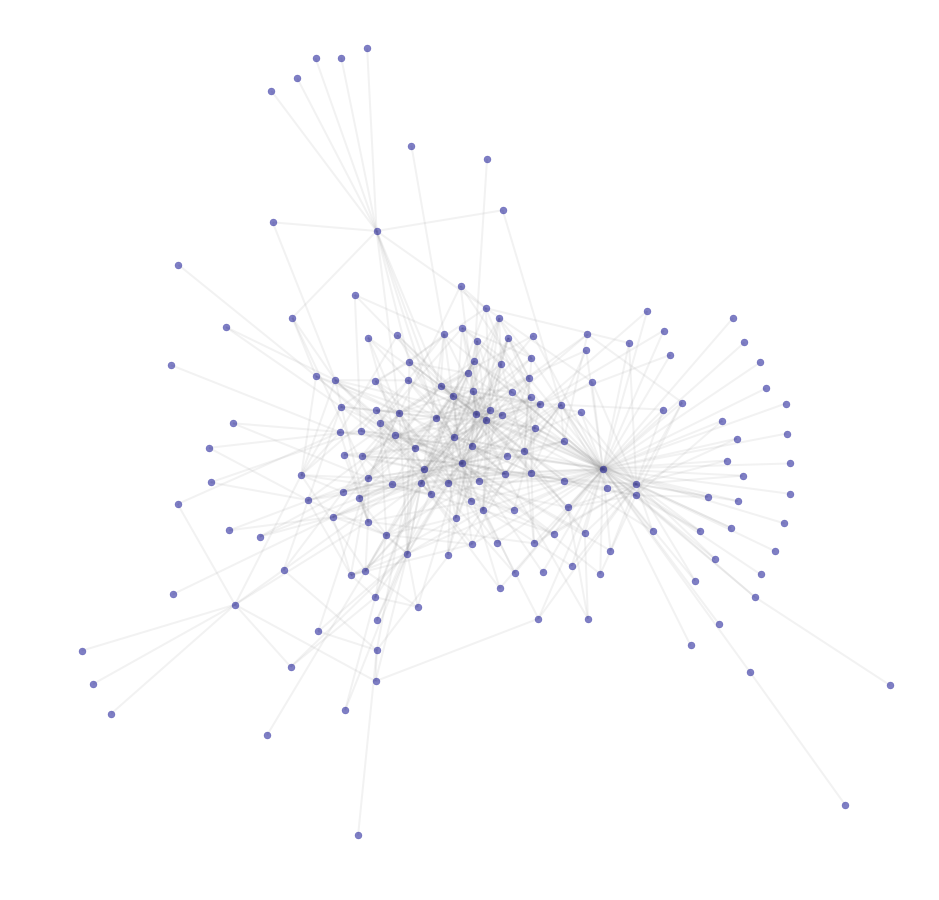

In [63]:
plt.figure(figsize=(16,16))
G_3= nx.Graph()
for i, elrow in graph_df_filt.iterrows():
    G_3.add_edge(elrow[0], elrow[1])

pos_3 = nx.layout.spring_layout(G_3)

edges = nx.draw_networkx_edges(G_3, pos_3, edge_color="gray", alpha=.1, width=2)
nodes = nx.draw_networkx_nodes(G_3, pos_3, node_size=50, node_color='darkblue', alpha=.5)
# labels = nx.draw_networkx_labels(G_3, pos_3, font_size=10)
ax = plt.gca()
ax.set_axis_off()
plt.show()